In [1]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from helper_files.plotting_functions import get_opponent_df, generate_fv_grid, plot_heatmap, generate_cp_grid

In [2]:
models = joblib.load('../data/models/all_models.jblb')

/Users/bradeneberhard/miniforge3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


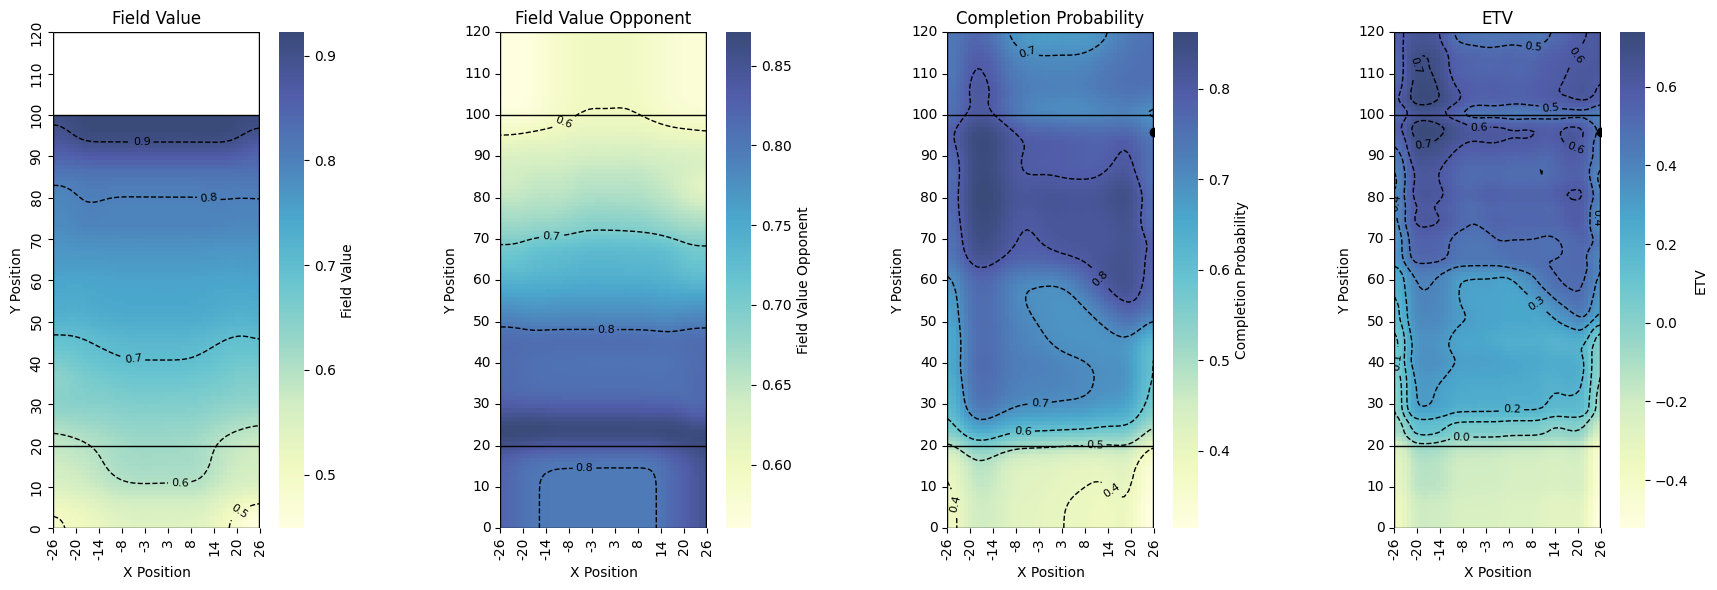

In [16]:
defaults = {'possession_num':1, 'possession_throw':4,'game_quarter':1, 'quarter_point':1,'score_diff':0,'times':10}
sigma = 3
thrower_x, thrower_y = 50, 96
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

fv_grid = generate_fv_grid(-26.66, 26.67, 0, 100, 50, 100, default_columns=defaults, include_interaction=False)
fv = plot_heatmap(models['fv_model']['model'], fv_grid, 50, 100, title='Field Value', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[0])

cp_grid = generate_cp_grid(thrower_x=thrower_x, thrower_y=thrower_y, default_columns=defaults)
cp = plot_heatmap(models['cp_model']['model'], cp_grid[models['cp_model']['features']], 50, 120, title='Completion Probability', scaler=models['cp_model']['scaler'], sigma=sigma, ax=axes[2], highlight_point=(thrower_x, thrower_y))

opponent_df = get_opponent_df(cp_grid)
fv_opponent = plot_heatmap(models['fv_model']['model'], opponent_df, 50, 120, title='Field Value Opponent', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[1])

etv = models['etv_model'].predict(cp_grid).reshape(120,50)
plot_heatmap(None, etv, 50, 120, title='ETV', sigma=1.5, ax=axes[3], highlight_point=(thrower_x, thrower_y))
plt.tight_layout()
plt.show()


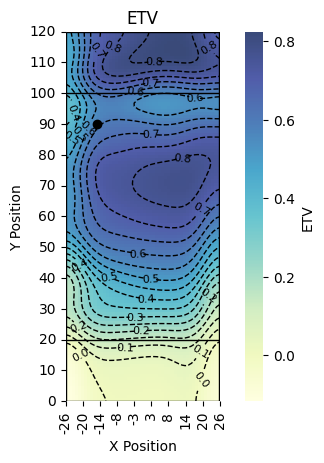

In [4]:
defaults = {'possession_num':1, 'possession_throw':4,'game_quarter':1, 'quarter_point':1,'score_diff':0,'times':12}
sigma = 5
thrower_x, thrower_y = 10, 90
cp_grid = generate_cp_grid(thrower_x=thrower_x, thrower_y=thrower_y, default_columns=defaults)
etv = models['etv_model'].predict(cp_grid).reshape(120,50)
_ = plot_heatmap(None, etv, 50, 120, title='ETV', sigma=sigma, highlight_point=(thrower_x, thrower_y), contour_every=0.05)